In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from collections import Counter

In [2]:
df = pd.read_csv("ADNI1_Complete_1Yr_1.5T_6_11_2021.csv")

In [36]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,6/05/2021
1,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,6/05/2021
2,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,6/05/2021
3,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,6/04/2021
4,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,6/04/2021


In [8]:

Counter(df['Sex'])

Counter({'M': 1341, 'F': 953})

In [9]:
title_type = df.groupby('Sex').agg('count')
print(title_type)

     Image Data ID  Subject  Group   Age  Visit  Modality  Description  Type  \
Sex                                                                            
F              953      953    953   953    953       953          953   953   
M             1341     1341   1341  1341   1341      1341         1341  1341   

     Acq Date  Format  Downloaded  
Sex                                
F         953     953         953  
M        1341    1341        1341  


In [10]:
type_labels = title_type.Age.sort_values().index 
type_counts = title_type.Age.sort_values()

In [23]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

([<matplotlib.patches.Wedge at 0x7fe9aba67be0>,
 [Text(0.2888215851817541, 1.0614057150463714, 'F'),
  Text(-0.2888215851817547, -1.0614057150463712, 'M')],
 [Text(0.15753904646277495, 0.5789485718434753, '41.5%'),
  Text(-0.15753904646277528, -0.5789485718434751, '58.5%')])

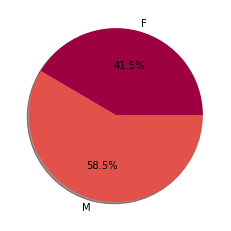

In [21]:
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)

In [25]:

Counter(df['Group'])

Counter({'MCI': 1113, 'CN': 705, 'AD': 476})

In [26]:
title_type = df.groupby('Group').agg('count')
print(title_type)

       Image Data ID  Subject   Sex   Age  Visit  Modality  Description  Type  \
Group                                                                           
AD               476      476   476   476    476       476          476   476   
CN               705      705   705   705    705       705          705   705   
MCI             1113     1113  1113  1113   1113      1113         1113  1113   

       Acq Date  Format  Downloaded  
Group                                
AD          476     476         476  
CN          705     705         705  
MCI        1113    1113        1113  


In [27]:
type_labels = title_type.Age.sort_values().index 
type_counts = title_type.Age.sort_values()

([<matplotlib.patches.Wedge at 0x7fe9abc2aeb0>,
 [Text(0.8744433586298186, 0.6673445980512637, 'AD'),
  Text(-0.7073227888051917, 0.8424336605554447, 'CN'),
  Text(0.05120019915708099, -1.0988077810091605, 'MCI')],
 [Text(0.47696910470717374, 0.36400614439159834, '20.7%'),
  Text(-0.38581243025737727, 0.45950926939387887, '30.7%'),
  Text(0.027927381358407808, -0.5993496987322694, '48.5%')])

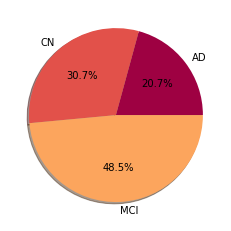

In [28]:
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)

<BarContainer object of 2294 artists>

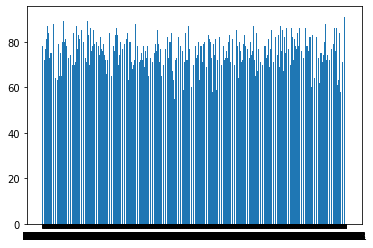

In [30]:
plt.bar(df['Image Data ID'],df.Age)

In [31]:
min(df.Age)

55

In [32]:
max(df.Age)

91

In [34]:
bins = [50,60,70,80,100]
labels = ['50-60','60-70','70-80','80 above']

In [38]:
age_group = pd.cut(df['Age'], bins = bins, labels = labels, right = False )
type(age_group)

pandas.core.series.Series

In [39]:
df['age_group'] = age_group

In [40]:
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,age_group
0,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,6/05/2021,70-80
1,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,6/05/2021,60-70
2,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,6/05/2021,70-80
3,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,6/04/2021,70-80
4,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,6/04/2021,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,I40966,002_S_0295,CN,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,11/02/2006,NiFTI,6/03/2021,80 above
2290,I118692,002_S_0295,CN,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,11/02/2006,NiFTI,6/05/2021,80 above
2291,I45108,002_S_0295,CN,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,6/03/2021,80 above
2292,I118671,002_S_0295,CN,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,4/18/2006,NiFTI,6/05/2021,80 above


In [41]:
m = df.groupby('age_group').agg('count')
m

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
age_group,,,,,,,,,,,,
50-60,42,42,42,42,42,42,42,42,42,42,42,42
60-70,278,278,278,278,278,278,278,278,278,278,278,278
70-80,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
80 above,671,671,671,671,671,671,671,671,671,671,671,671


Text(0.5, 1.0, 'Number of patients in different age groups')

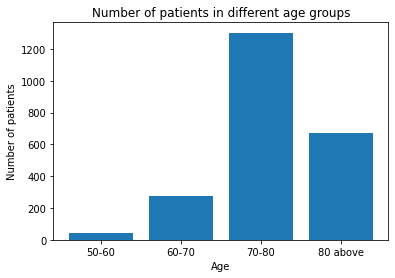

In [45]:
plt.bar(labels,m.Age )
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Number of patients in different age groups')

In [52]:
df.groupby('Group' and 'Sex').agg('count')

,Image Data ID,Subject,Group,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,age_group
Sex,,,,,,,,,,,,
F,953,953,953,953,953,953,953,953,953,953,953,953
M,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341


In [ ]:


X = ['AD','MCI','CN']
male = [10,20,20,40]
female = [20,30,25,30]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male, 0.4, label = 'male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'female')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()
